<a href="https://colab.research.google.com/github/cod3astro/kaggle_ML_competition/blob/main/collab_kaggle_beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install catboost category_encoders

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [28]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
target_col = "BeatsPerMinute"
y = train[target_col]
train = train.drop(columns=[target_col])
train['is_train'] = 1
test['is_train'] = 0
df = pd.concat([train, test], axis=0)
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,is_train
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,1
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,1
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,1
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,1
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,1


In [29]:
df.shape

(698886, 10)

In [30]:
df.describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,is_train
count,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000,698886.000000
mean,0.632780,-8.378635,0.074451,0.262910,0.117619,0.178378,0.555848,241866.203709,0.500828,0.749999
std,0.156982,4.617735,0.049960,0.223065,0.131791,0.118180,0.225665,59270.996893,0.290102,0.433013
min,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,0.000000
25%,0.515768,-11.551713,0.023500,0.069421,0.000001,0.077640,0.403898,207099.986725,0.254800,0.250000
50%,0.634682,-8.252704,0.066426,0.242467,0.074202,0.166040,0.564960,243629.488550,0.511867,1.000000
75%,0.739179,-4.909687,0.107329,0.396941,0.203934,0.268884,0.716644,281809.660600,0.746067,1.000000
max,0.975000,-1.357000,0.258857,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,1.000000


In [34]:
df.columns

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'is_train'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698886 entries, 0 to 698885
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                698886 non-null  float64
 1   AudioLoudness              698886 non-null  float64
 2   VocalContent               698886 non-null  float64
 3   AcousticQuality            698886 non-null  float64
 4   InstrumentalScore          698886 non-null  float64
 5   LivePerformanceLikelihood  698886 non-null  float64
 6   MoodScore                  698886 non-null  float64
 7   TrackDurationMs            698886 non-null  float64
 8   Energy                     698886 non-null  float64
 9   is_train                   698886 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 58.7 MB


In [32]:
df.isnull().any().any()

np.False_

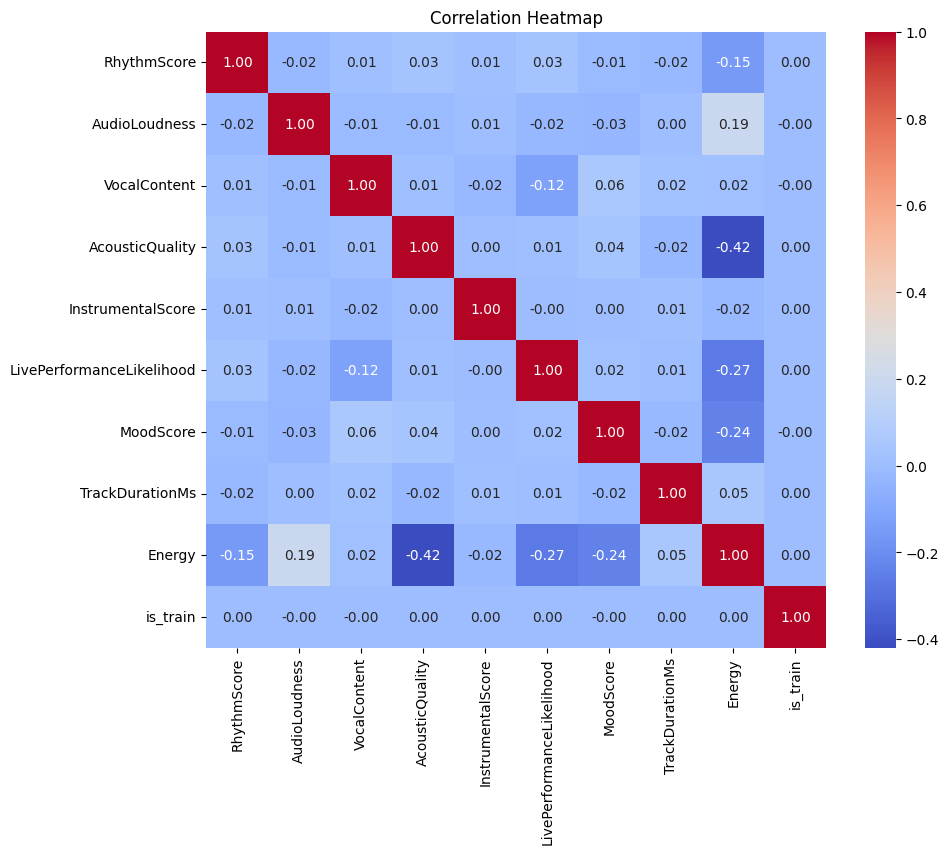

In [33]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from scipy.stats import pointbiserialr, chi2_contingency
from imblearn.pipeline import Pipeline as ImbPipeline